In [98]:
import nltk
import pandas as pd
nltk.download('stopwords')
from langdetect import detect
import re
import emoji

from nltk.corpus import stopwords
nltk.download('words')
words = set(nltk.corpus.words.words())

df1 = pd.read_csv("S-Covid-2021-1.csv")
df2 = pd.read_csv("S-Covid-2021-2.csv")
df3 = pd.read_csv("S-Covid-2021-3.csv")
df4 = pd.read_csv("S-Covid-2021-4.csv")
df5 = pd.read_csv("S-Covid-2021-5.csv")
df6 = pd.read_csv("S-Covid-2021-6.csv")
df7 = pd.read_csv("S-Covid-2021-7.csv")
df8 = pd.read_csv("S-Covid-2021-8.csv")
df9 = pd.read_csv("S-Covid-2021-9.csv")

df_F = [df1,df2,df3,df4,df5,df6,df7,df8,df9]
df= pd.concat(df_F)
#print(df)
df['Tweet']

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sujat\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\sujat\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


0        Year 12 are documenting the impact of the inte...
1        Thanks to LEE ROOD [@LeeRood] &amp; Des Moines...
2        The #EU abruptly reversed an attempt to block ...
3        U.K. Authorizes Covid-19 Vaccine From Oxford a...
4        Yesterday, I drove down to the Tuskegee Airmen...
                               ...                        
49995    Hey @SimeonBrownMP I see in today’s NZ Herald ...
49996    @388Stavros @VaxxedM @PeacefulResist_ @Kathari...
49997    April 13, 2020, recovered COVID cases world-wi...
49998    We had a great turn out during the first 2 wee...
49999    Mississippi Governor Deflects From Having 2nd ...
Name: Tweet, Length: 450000, dtype: object

In [108]:
import spacy
#loading the english language small model of spacy
en = spacy.load('en_core_web_sm')
stopwords = en.Defaults.stop_words

print(len(stopwords))
print(stopwords)

326
{'because', 'too', 'front', '’ve', 'sometime', "'d", 'just', 'me', 'seemed', 'whom', 'also', 'hundred', 'until', 'yourselves', 'therein', 'can', 'be', 'will', 'enough', 'about', 'could', 'itself', 'might', 'several', 'have', 'nine', '‘re', 'again', 'against', 'behind', 'fifty', 'here', 'an', 'into', 'keep', 'side', 'one', 'anyway', 'latterly', 'others', 'his', 'third', 'otherwise', 'full', 'doing', 'both', 'which', 'nowhere', '‘m', 'throughout', 'namely', 'all', 'yourself', 'two', 'whoever', 're', 'beside', 'not', 'where', 'when', 'along', 'may', 'then', 'some', 'from', 'latter', 'three', 'least', 'very', 'indeed', 'our', 'even', 'mostly', 'really', 'thereupon', 'get', 'either', 'ourselves', 'across', 'while', 'whenever', 'quite', 'around', 'beforehand', '‘ll', 'neither', 'thru', 'every', 'elsewhere', 'moreover', 'noone', 'move', 'that', 'whereupon', '’s', 'as', 'say', 'via', 'eight', 'call', 'herself', 'everyone', "'ve", 'up', 'before', 'besides', 'on', 'upon', 'seem', 'between', 

In [107]:
 !python -m spacy download en_core_web_sm 

Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 12.8/12.8 MB 8.2 MB/s eta 0:00:00
[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [110]:
stop_words = stopwords
df['Tweet'] = df['Tweet'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

df[df['Tweet'].map(lambda x: x.isascii())]

df['Tweet'] = df['Tweet'].str.lower()



In [111]:
df

,Unnamed: 0,Date,User,Tweet
0,0,2021-01-30 23:59:32+00:00,DesignHgs,year 12 documenting impact international pande...
1,1,2021-01-30 23:59:08+00:00,toddjacobus,thanks lee rood [@leerood] &amp; des moines re...
2,2,2021-01-30 23:59:08+00:00,Diplomacy140,#eu abruptly reversed attempt block #covid_19 ...
3,3,2021-01-30 23:59:02+00:00,daniela_treiber,u.k. authorizes covid-19 vaccine oxford astraz...
4,4,2021-01-30 23:59:01+00:00,AnthonyHegler,"yesterday, drove tuskegee airmen national hist..."
...,...,...,...,...
49995,49995,2021-09-20 00:39:36+00:00,onThePaepae,hey @simeonbrownmp today’s nz herald you’re ‘b...
49996,49996,2021-09-20 00:39:04+00:00,JPuppetsforlife,@388stavros @vaxxedm @peacefulresist_ @kathari...
49997,49997,2021-09-20 00:38:43+00:00,patsphotos,"april 13, 2020, recovered covid cases world-wi..."
49998,49998,2021-09-20 00:37:45+00:00,ucsdcocreate,great turn 2 weeks new site. 811 covid-19 test...


In [112]:
df['detect'] = df['Tweet'].apply(detect)
df = df[df['detect'] == 'en']

LangDetectException: No features in text.

In [113]:
print(df.head())

   Unnamed: 0                       Date             User  \
0           0  2021-01-30 23:59:32+00:00        DesignHgs   
1           1  2021-01-30 23:59:08+00:00      toddjacobus   
2           2  2021-01-30 23:59:08+00:00     Diplomacy140   
3           3  2021-01-30 23:59:02+00:00  daniela_treiber   
4           4  2021-01-30 23:59:01+00:00    AnthonyHegler   

                                               Tweet  
0  year 12 documenting impact international pande...  
1  thanks lee rood [@leerood] &amp; des moines re...  
2  #eu abruptly reversed attempt block #covid_19 ...  
3  u.k. authorizes covid-19 vaccine oxford astraz...  
4  yesterday, drove tuskegee airmen national hist...  


In [114]:
#Removing stop words
X= df['Tweet']

from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem import PorterStemmer

stop_words=stopwords.words('english')
stemmer=PorterStemmer()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sujat\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [115]:
#defining a function to clean the tweets
def cleaner(tweet):
    tweet = re.sub("@[A-Za-z0-9]+","",tweet) #Remove @ sign
    tweet = re.sub(r"(?:\@|http?\://|https?\://|www)\S+", "", tweet) #Remove http links
    tweet = " ".join(tweet.split())
    #tweet = ''.join(c for c in tweet if c not in emoji.UNICODE_EMOJI) #Remove Emojis
    tweet = tweet.replace("#", "") #Remove hashtag sign but keep the text
    tweet = tweet.replace(".", "")
    tweet = tweet.replace("-", "")
    tweet = tweet.replace(",", "")
    tweet = tweet.replace("''", "")
    tweet = tweet.replace(":", "")
    tweet = tweet.replace(";", "")
    tweet = tweet.replace("?", "")
    tweet = tweet.replace("!", "")
    tweet = tweet.replace("&", "")
    tweet = tweet.replace("(", "")
    tweet = tweet.replace("(", "")
    tweet = tweet.replace(")", "")
    tweet = tweet.replace("...", "")
    tweet = tweet.replace("'", "")
    tweet = tweet.replace(" the ", "")
    tweet = tweet.replace(" i ", "")
    tweet = tweet.replace(" a ", "")
    tweet = tweet.replace(" t ", "")
    tweet = tweet.replace("\"", "")
    tweet = tweet.replace(" from ", "")
    tweet = tweet.replace(" s ", "")
    tweet = " ".join(w for w in nltk.wordpunct_tokenize(tweet) 
        if w.lower() in words or not w.isalpha())
    return tweet
df['Tweet'] = df['Tweet'].map(lambda x: cleaner(x))

In [117]:
df.to_csv("S-Covid1-cleaned.csv")

In [118]:
from nltk.corpus import stopwords

In [119]:
df = pd.read_csv("S-Covid1-cleaned.csv")
print(df.head())

   Unnamed: 0.1  Unnamed: 0                       Date             User  \
0             0           0  2021-01-30 23:59:32+00:00        DesignHgs   
1             1           1  2021-01-30 23:59:08+00:00      toddjacobus   
2             2           2  2021-01-30 23:59:08+00:00     Diplomacy140   
3             3           3  2021-01-30 23:59:02+00:00  daniela_treiber   
4             4           4  2021-01-30 23:59:01+00:00    AnthonyHegler   

                                               Tweet  
0  year 12 impact international pandemic north 3 ...  
1  thanks lee rood [] register [] tribute mike su...  
2  eu abruptly reversed attempt block covid_19 sh...  
3                     covid19 vaccine new york times  
4  yesterday drove national historic site visit m...  


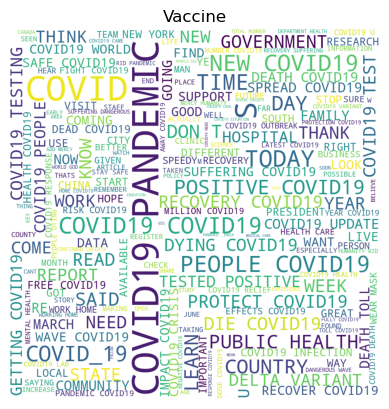

In [120]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

def wordcloud_by_province(tweets):
    stopwords = set(STOPWORDS)
    stopwords.add("Pfizer")
    #stopwords.drop("https")
    stopwords.add("Moderna")
    stopwords.add("covishield")
    stopwords.add("Vaccination")
    stopwords.add("masks")
    stopwords.add("Vaccine")
    stopwords.add("AstraZeneca")
    #Narendra Modi is the Prime minister of India
    stopwords.add("virus")
    wordcloud = WordCloud(width=900, height=900,background_color="white",stopwords=stopwords,random_state = 2016).generate(" ".join([i for i in df['Tweet'].str.upper()]))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.title("Vaccine")

wordcloud_by_province(df['Tweet'])  

In [121]:

from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
sentiments = SentimentIntensityAnalyzer()


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\sujat\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [122]:
df["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in df["Tweet"]]
df["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in df["Tweet"]]
df["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in df["Tweet"]]

In [123]:
data = df[["Tweet", "Positive", 
             "Negative", "Neutral"]]
print(data.head())

                                               Tweet  Positive  Negative  \
0  year 12 impact international pandemic north 3 ...     0.500     0.000   
1  thanks lee rood [] register [] tribute mike su...     0.463     0.000   
2  eu abruptly reversed attempt block covid_19 sh...     0.000     0.195   
3                     covid19 vaccine new york times     0.000     0.000   
4  yesterday drove national historic site visit m...     0.000     0.136   

   Neutral  
0    0.500  
1    0.537  
2    0.805  
3    1.000  
4    0.864  


In [125]:
sorted_df1 = data.sort_values(by=['Positive'], ascending=False)
sorted_df2 = data.sort_values(by=['Negative'], ascending=False)
sorted_df3 = data.sort_values(by=['Neutral'], ascending=False)

In [141]:
TweetSentiment_positive = [[sorted_df1['Tweet'].iloc[0], 'Tweet'],[sorted_df1['Positive'].iloc[0],'Positive'],[ sorted_df1['Negative'].iloc[0],'Negative'],[sorted_df1['Neutral'].iloc[0],'Neutral']]
TweetSentiment_positive

[['hopefully feeling better covid19 love', 'Tweet'],
 [0.919, 'Positive'],
 [0.0, 'Negative'],
 [0.081, 'Neutral']]

In [142]:
TweetSentiment_Negative = [[sorted_df2['Tweet'].iloc[0], 'Tweet'],[sorted_df2['Positive'].iloc[0],'Positive'],[ sorted_df2['Negative'].iloc[0],'Negative'],[sorted_df2['Neutral'].iloc[0],'Neutral']]
TweetSentiment_Negative

[['500000 lost covid19 seriously ill 5 dead terrorism injured sorry wrong',
  'Tweet'],
 [0.0, 'Positive'],
 [0.919, 'Negative'],
 [0.081, 'Neutral']]

In [143]:
TweetSentiment_Neutral = [[sorted_df3['Tweet'].iloc[0], 'Tweet'],[sorted_df3['Positive'].iloc[0],'Positive'],[ sorted_df3['Negative'].iloc[0],'Negative'],[sorted_df3['Neutral'].iloc[0],'Neutral']]
TweetSentiment_Neutral

[['🚨 reminder 🚨 august 2 day second dose covid19 vaccine clinic clinic open daily 8 am 630 spaced 28 days apart 💉',
  'Tweet'],
 [0.0, 'Positive'],
 [0.0, 'Negative'],
 [1.0, 'Neutral']]

In [144]:

x = sum(data["Positive"])
y = sum(data["Negative"])
z = sum(data["Neutral"])

def sentiment_score(a, b, c):
    if (a>b) and (a>c):
        print("Positive 😊 ")
    elif (b>a) and (b>c):
        print("Negative 😠 ")
    else:
        print("Neutral 🙂 ")
sentiment_score(x, y, z)

Neutral 🙂 


In [145]:
print("Positive: ", x)
print("Negative: ", y)
print("Neutral: ", z)

Positive:  67274.96699999338
Negative:  53744.99999999916
Neutral:  328979.5129999791


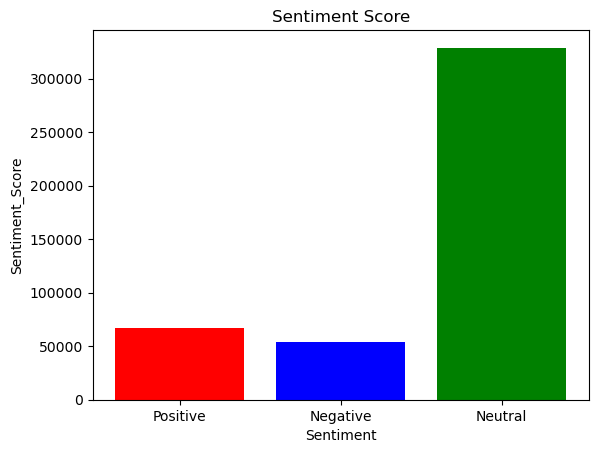

In [146]:
import matplotlib.pyplot as plt
import numpy as np
   
Sentiment = ['Positive','Negative','Neutral']
Sentiment_Score = [x,y,z]

plt.bar(Sentiment, Sentiment_Score)
plt.title('Sentiment Score')
plt.xlabel('Sentiment')
plt.ylabel('Sentiment_Score')

x_pos = np.arange(len(Sentiment))
# Create bars with different colors
plt.bar(x_pos, Sentiment_Score, color=['red','blue', 'green'])

plt.show()


In [148]:
#Now we will be making frequency count using bag of words approach
# get most common words in training dataset

from collections import Counter

all_words = []
for line in list(data['Tweet']):
    words = line.split()
    for word in words:
        all_words.append(word.lower())
    
#most_common_word = pd.DataFrame.from_dict(Counter(all_words))

most_common_word=pd.value_counts(np.array(all_words))
most_common_word 
#MCW = pd.DataFrame(Counter.items(most_common_word),Counter.values(most_common_word) )
most_common_word.to_csv("most_frequent_words.csv")

In [151]:
mcw = pd.read_csv("most_frequent_words.csv", nrows=20)
mcw

,word,Frequency
0,covid19,448411
1,health,36141
2,vaccine,69793
3,people,59997
4,covid,49880
5,pandemic,43211
6,new,42620
7,virus,22831
8,vaccination,21033
9,death,16640


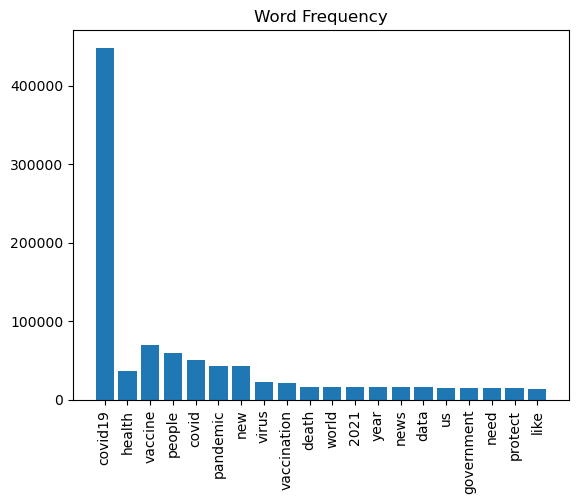

In [152]:
# importing the required module
import matplotlib.pyplot as plt
import seaborn as sns
  
# x axis values
x = mcw['word']
  
# y axis values
y =mcw['Frequency']
  
# plotting strip plot with seaborn
#ax = sns.stripplot(x, y);
plt.bar(x, y)
plt.xticks(rotation=90)
  
# giving labels to x-axis and y-axis
ax.set(xlabel ='words', ylabel ='Frequency')
  
# giving title to the plot
plt.title('Word Frequency');
  
# function to show plot
plt.show()

In [64]:
from collections import Counter

def count_words_fast(text):
    text = text.lower()
    skips = [".", ",", ";", ":", "'", '"', "\n", "!", "?", "(", ")"]
    for ch in skips:
        text = text.replace(ch, "")
    word_counts = Counter(text.split(" "))
    return word_counts

def word_stats(word_counts):
    num_unique = len(word_counts)
    counts = word_counts.values()
    return (num_unique, counts)

NameError: name 'word_counts' is not defined

AttributeError: 'list' object has no attribute 'head'

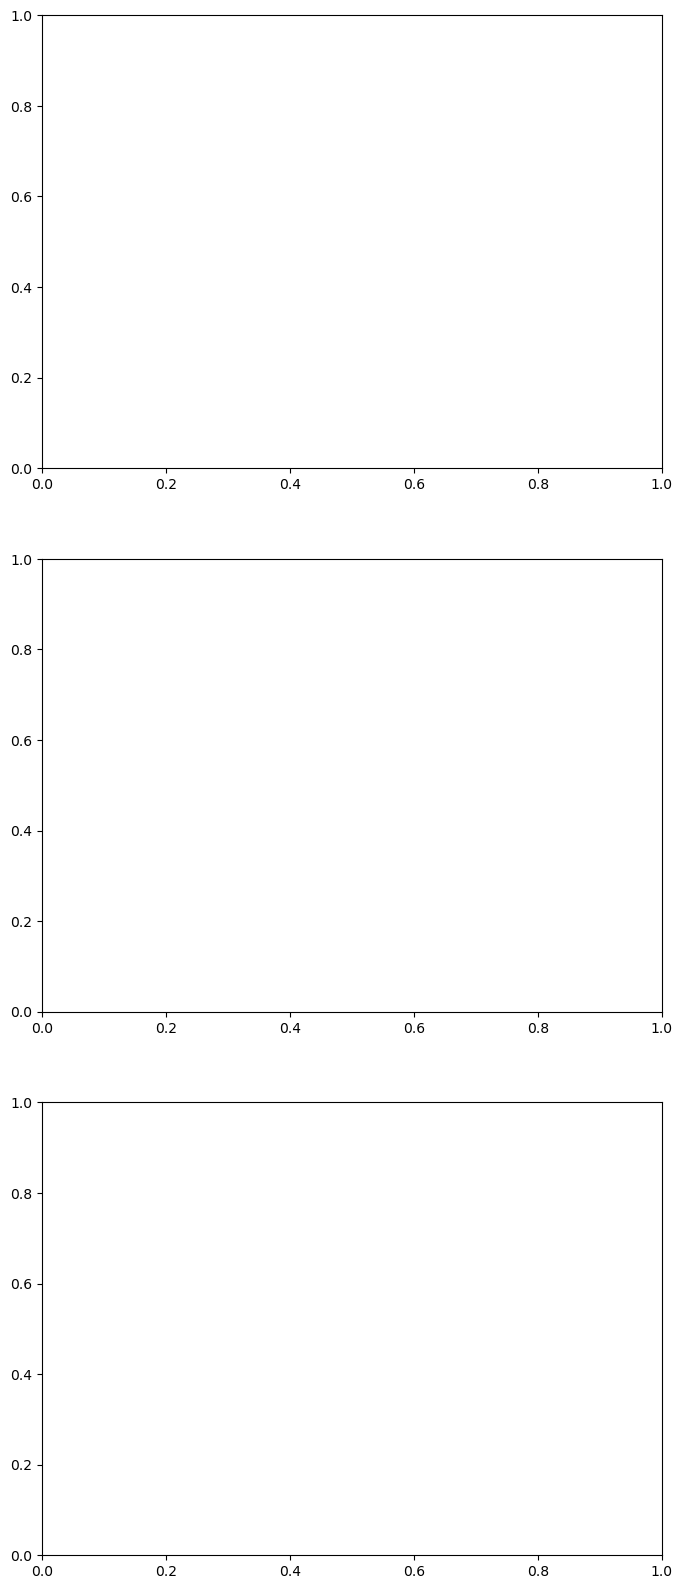